# Example case of fitting a spherical cluster. #

This thread shows how to use _M2_ProposalTools_ to fit a spherical cluster model to an input fits file.

In [2]:
### Useful libraries
import numpy as np
import astropy.units as u
from astropy.io import fits 
#### Modules within our library
import M2_ProposalTools.WorkHorse as WH
import M2_ProposalTools.MakeRMSmap as MRM
import M2_ProposalTools.ModelFitting as MF

In the simulate observation notebook, we created a fits file that had an unsmoothed output (that is, a beam-convolved and filtered image, but not further smoothing) and a corresponding sensitivity map. This notebook takes that fits file as its input.

In [3]:
outdir   = "/home/data/MUSTANG2/SimulatedObservations/LightWeight/"
InputStr = "0z5_6m0_3s5_3s5_10h0_10h0_4p0"
filename = "SimulatedObs_Unsmoothed_"+InputStr+".fits"

We also need to know the redshift and would like to have an initial guess of the mass. I'll start with the known mass because an output figure will display the A10 pressure profile for that mass (and we select the option Dist=True to reflect that our simulated cluster assumed the A10 disturbed pressure profile).

In [4]:
M5_14    = 6.0                     # We leave this separate as we'll want to reference this below
M500     = M5_14*1e14*u.M_sun      # Make M500 a quantity in solar masses
z        = 0.5                     # The redshift

We'll actually feed in the HDUList to a routine. Finally, let's add a few other inputs for the fitting.

kpc per arcsecond:  6.103926332085241
[2.42406841e-05 8.50977740e-04] 6 10.180136917182592 4.0
Bins start with:  [  5.          10.18696162  20.75483742  42.28574646  86.15265527
 175.52675858]
Bins are now:  [  5.          10.18696162  20.75483742  42.28574646  86.15265527
 175.52675858]


/home/charles/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
100%|██████████| 1000/1000 [10:51<00:00,  1.53it/s]


###########################################################################
R500 found to be:  0.0008949416122431594  radians
M500 found to be:  6.978800079209261  \pm  1.596139018472051  1e14 M_sun
P500 found to be:  0.006514494069113811 keV / cm3
Systematic error on M500:  0.04902696627961376  1e14 M_sun
###########################################################################
[[-2.73992292e-07  6.99075231e-07  6.87233849e-07]
 [ 2.92078066e-01  1.86009693e-01  1.43231768e-01]
 [ 2.50697684e-01  1.23954175e-01  9.45349812e-02]
 [ 1.81850850e-01  4.45211127e-02  3.68876686e-02]
 [ 1.03278019e-01  1.48910584e-02  1.53938346e-02]
 [ 4.60183397e-02  1.02016132e-02  9.10471789e-03]
 [ 7.93296786e-03  3.47341038e-03  3.59500265e-03]
 [-1.43092319e+00  3.16142714e+00  3.89835522e+00]
 [-1.16540253e+00  2.99370036e+00  3.57790755e+00]]


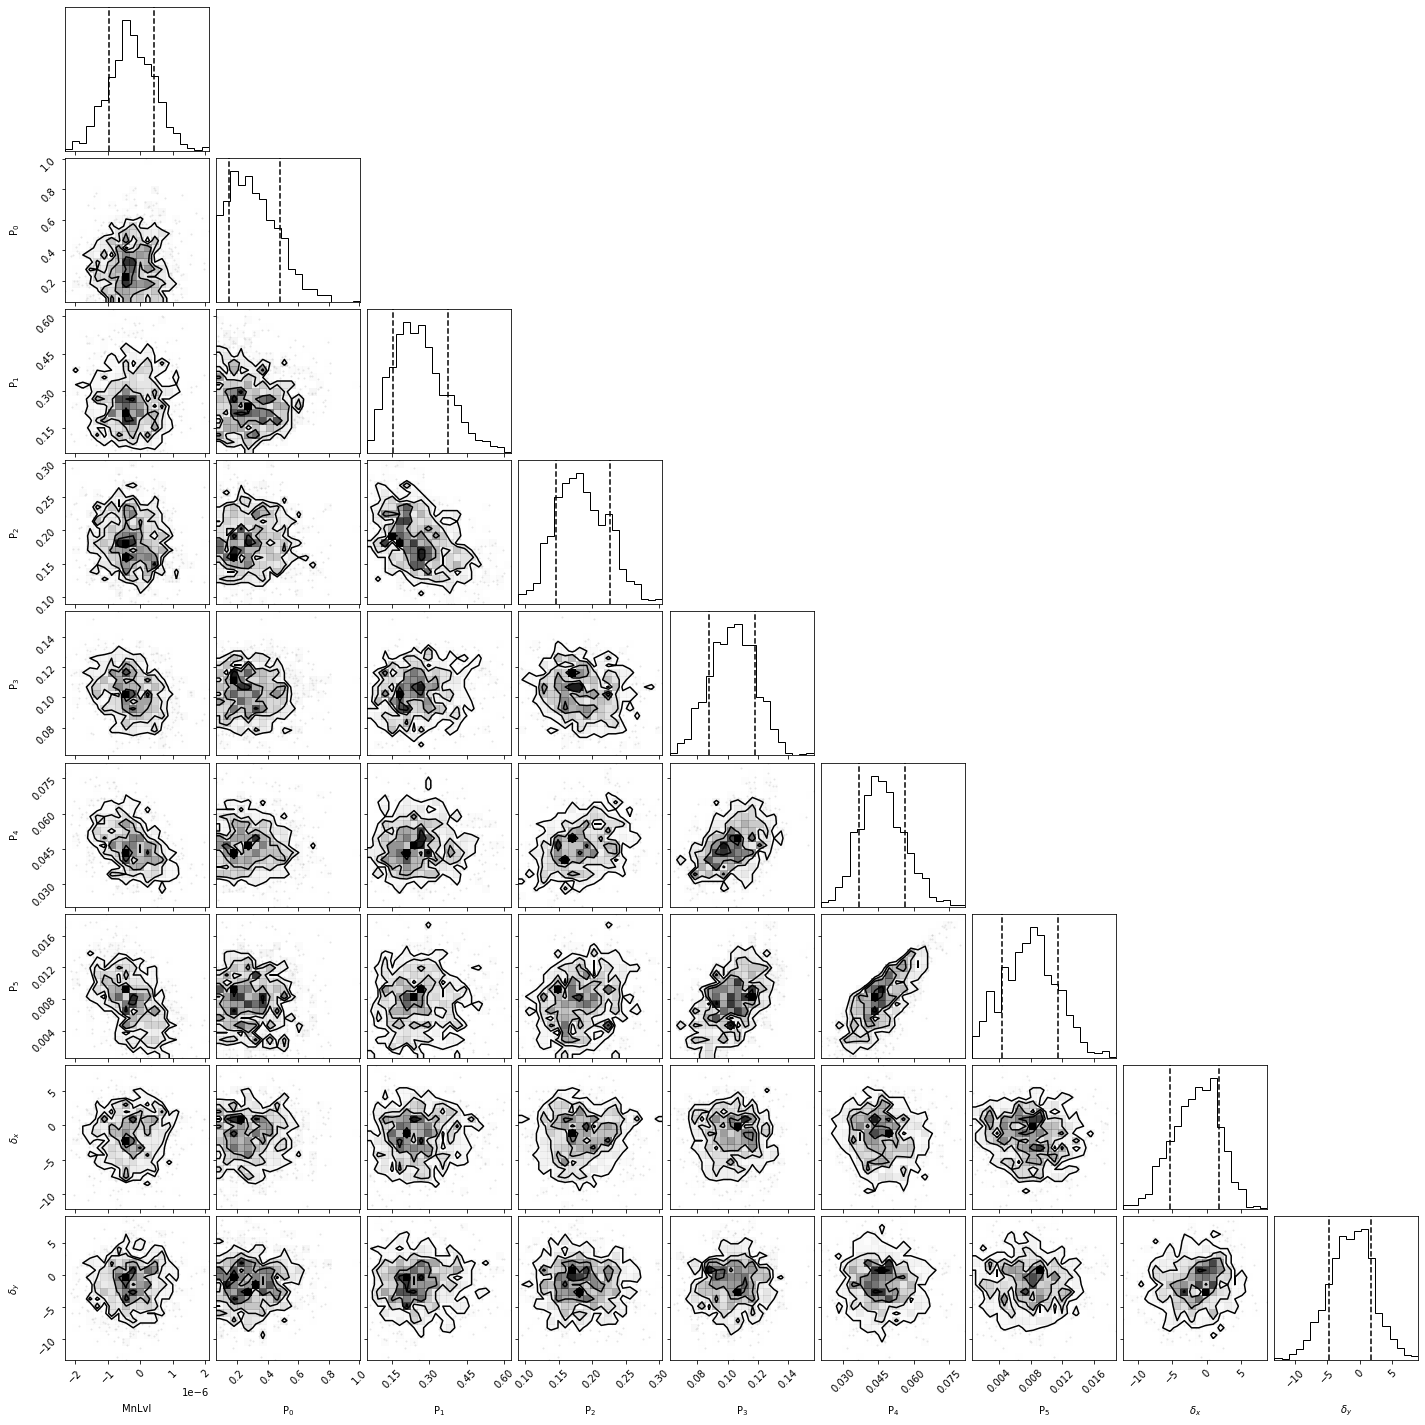

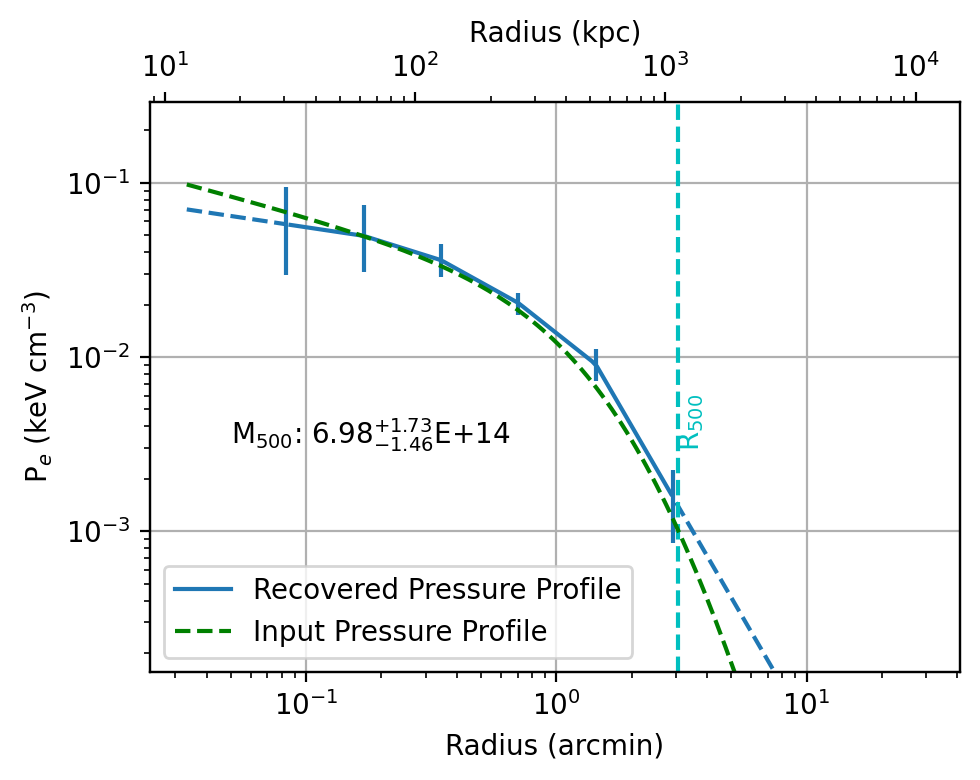

In [5]:
inputHDU = fits.open(outdir+filename)
nsteps   = 1000
nsstr    = "_"+repr(nsteps)+"steps"
outbase = "NP_fit_"+InputStr+nsstr+"_corner.png"
MF.fit_spherical_model(z,M500,inputHDU,outdir=outdir,nsteps=nsteps,outbase=outbase,Dist=True)   # 100 for testing purposes

The recovered profile decent; a slight over-estimation, but perfectly consistent with the input.

I would encourage proposers to use this only as a rough guide and understand that many factors can work against acheiving such clean results.